In [1]:
## import public packages
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.cluster import KMeans
from scipy.stats import norm
from scipy.stats import multivariate_normal
import torch
from torch.autograd import Variable

## import self-written packages 
from util import *
from prim_fdr import *
from data_loader import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

## bh testing summary ##
# n_rej = 9903
# t_rej = 0.009903


FDP: 0.0778551953953 

## sbh summary ##
# n_rej = 11380
# t_rej = 0.014590
# pi_0 estimate = 0.780


FDP: 0.100702987698



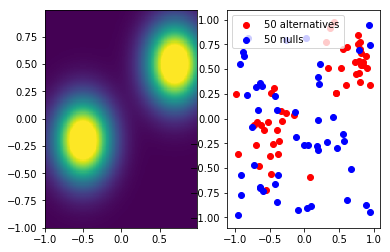

In [2]:
## generating a 1d toy data 
# p,x,h=toy_data_1d(n_sample=100000,vis=1)
p,h,x=neuralfdr_generate_data_2D(job=0,data_vis=1) ## gaussian mixture
# p,h,x=neuralfdr_generate_data_2D(job=1,data_vis=1) ## linear trend 
# p,h,x=neuralfdr_generate_data_2D(job=2,data_vis=1) ## gaussian mixture + linear trend

## testing the BH method
n_rej,t_rej=bh(p,alpha=0.1,verbose=True)
print('FDP: %s \n'%str( np.sum((h==0)*(p<t_rej)/np.sum(p<t_rej))))

## testing the Storey BH method
n_rej,t_rej,pi0_hat=storey_bh(p,alpha=0.1,verbose=True)
print('FDP: %s\n'%str( np.sum((h==0)*(p<t_rej)/np.sum(p<t_rej))))

## PrimFDR_init starts
# Learning null distribution
# Learning alternative distribution
# Test result with PrimFDR_init
# Num of discovery: 19636




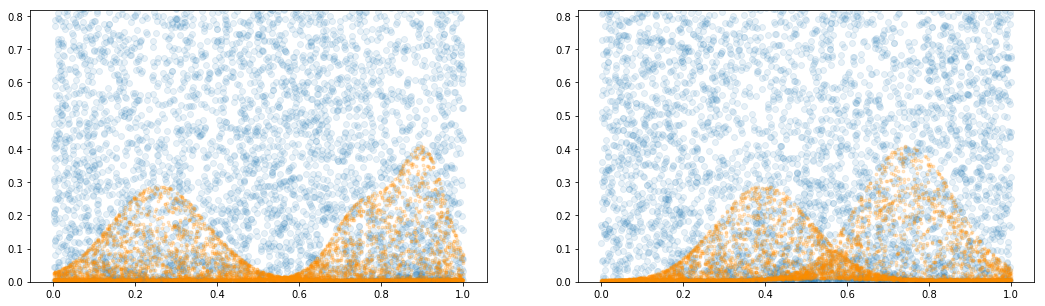

## PrimFDR_init finishes

## optimization paramter:
# n_itr=20000, n_samp=100000, lambda0=252, lambda1=100

## optimization initialization:
# Slope: a=[ 0.74234861  0.74234861], b=[-6.10495949]
# Bump 0: w=-1.6461, mu=[ 0.76109493  0.76499796], sigma=[ 0.010009   0.0205764]
# Bump 1: w=-2.04286, mu=[ 0.24631025  0.42348698], sigma=[ 0.02461807  0.02995868]
# Bump 2: w=-2.91929, mu=[ 0.77629966  0.70178294], sigma=[ 0.01734352  0.02617341]
# Bump 3: w=-1.81622, mu=[ 0.26514629  0.3768383 ], sigma=[ 0.02821316  0.02355279]
# Bump 4: w=-1.08162, mu=[ 0.90404153  0.74675703], sigma=[ 0.00586075  0.02604594]


## iteration 0
n_rej:  19597
n_rej sig:  19597.9
FD esti mirror: 1959
FD esti mirror sig: 1996.76
loss1:  [-0.19597949]
loss2:  [ 0.03696177]
Estimated FDP: [ 0.101886]
FDP: 0.0
Slope: a=[ 0.73734862  0.73734862], b=[-6.1099596]
Bump 0: w=-1.6511, mu=[ 0.76609492  0.75999796], sigma=[ 0.010009   0.0205764]
Bump 1: w=-2.04786, mu=[ 0.24131025  0.41848698], sigma=[ 0.02461807  0.0299586

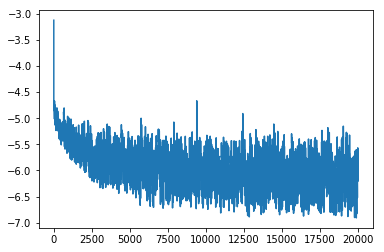

# Num of discovery: 20194




ValueError: too many values to unpack (expected 2)

In [ ]:
n_rej,t,_=PrimFDR(p,x,5,alpha=0.1,h=None,n_itr=20000,verbose=True)

In [ ]:
_=PrimFDR_cv(p,x,5,alpha=0.1,n_itr=10000,h=None,verbose=True)

#time start: 0.0s
#time input: 0.0029s
## testing fold 1: 0.0029s


### Testing 2d GM+LT

Screen Shot 2018-03-02 at 12.10.50 AM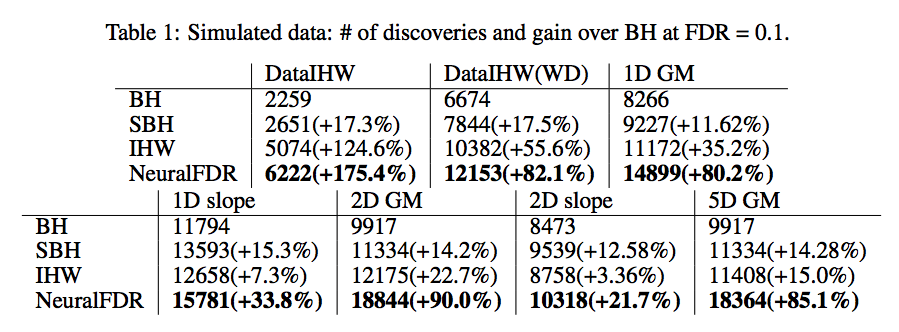

In [3]:
## testing the initialization 
w,a,mu,sigma = ML_init(p,x,3,alpha=0.1,n_itr=100,h=h,verbose=True)

# plt.figure()
# temp=np.linspace(0,1,101)
# plt.hist(x[h==1],bins=50,weights=1/np.sum(h==1)*50*np.ones([np.sum(h==1)]))
# temp = np.linspace(0,1,101)
# plt.plot(temp,f_all(temp,a,mu,sigma,w))
# plt.show()

### ML initialization starts ###

## Learned parameters: ##
Slope: w=0.686407465542, a=[ 0.9376416  -0.42949707]
Bump 0: w=0.136498323903, mu=[ 0.81574845  0.73854095], sigma=[ 0.09285315  0.11146091]
Bump 1: w=0.153519947202, mu=[ 0.25730885  0.38865851], sigma=[ 0.10473719  0.11977248]
Bump 2: w=0.0235742633522, mu=[ 0.54089265  0.35566079], sigma=[ 0.13526127  0.12702442]


## Testing Summary ##
Num of alternatives: 31232.0
Num of discovery: 20855
Num of true discovery: 18836.0
Actual FDP: 0.0968113162311




### Parameters
n_itr=100, n_samp=100000, lambda0=63.5896341778, lambda1=100.0
### ML initialization starts ###

## Learned parameters: ##
Slope: w=0.686407465542, a=[ 0.9376416  -0.42949707]
Bump 0: w=0.136498323903, mu=[ 0.81574845  0.73854095], sigma=[ 0.09285315  0.11146091]
Bump 1: w=0.153519947202, mu=[ 0.25730885  0.38865851], sigma=[ 0.10473719  0.11977248]
Bump 2: w=0.0235742633522, mu=[ 0.54089265  0.35566079], sigma=[ 0.13526127  0.12702442]


## Summary before optimization ##
## Testing Summary ##
Num of alternatives: 31232.0
Num of discovery: 20844
Num of true discovery: 18823.0
Actual FDP: 0.0969583573211


### initialization value ###
Slope: a=[ 0.93764162 -0.42949706], b=[-4.92842531]
Bump 0: w=-3.51253, mu=[ 0.81574845  0.73854095], sigma=[ 0.01724342  0.02484707]
Bump 1: w=-3.58737, mu=[ 0.25730884  0.38865852], sigma=[ 0.02193976  0.0286909 ]
Bump 2: w=-5.77558, mu=[ 0.54089266  0.3556608 ], sigma=[ 0.03659122  0.03227041]


### iteration 0 ###
mean t:  0.0141296
mean

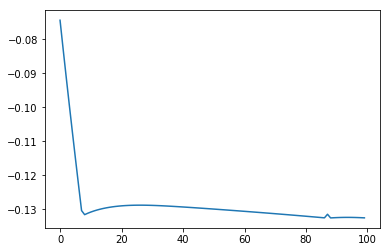

### Summary ###
method: perim_test_1d
# rejections: 21059
FDP: 0.0979153805974
### End Summary ###


In [4]:
## test prim_fdr
n_rej,t=PrimFDR(p,x,3,alpha=0.1,n_itr=100,h=h,verbose=True)
print("### Summary ###")
print("method: perim_test_1d")
print("# rejections: %s"%str(n_rej))
print("FDP: %s"%str( np.sum((h==0)*(p<t))/np.sum(p<t)))
print("### End Summary ###")